In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2, style = 'darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#import .csv file
data = pd.read_csv('FB_data_day_and_time.csv')

# 1. Data Exploration & Cleaning

### 1. Have a first look at data

In [4]:
data.head()

,Campaign name,Ad set name,Day,Time of day (viewer's time zone),Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,2019-12-01,21:00:00 - 21:59:59,On-Facebook leads,1.0,5.555556,0.793651,11.90,11.9,1.016129,94.444444,126,7,2019-12-01,2019-12-01
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,15:00:00 - 15:59:59,NaN,NaN,1.359223,NaN,58.30,NaN,1.011788,113.203883,515,7,2019-12-01,2019-12-01
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,13:00:00 - 13:59:59,NaN,NaN,0.000000,NaN,0.57,NaN,1.000000,114.000000,5,0,2019-12-01,2019-12-01
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,12:00:00 - 12:59:59,NaN,NaN,0.000000,NaN,0.33,NaN,1.000000,55.000000,6,0,2019-12-01,2019-12-01
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,01:00:00 - 01:59:59,NaN,NaN,1.886792,NaN,21.72,NaN,1.000000,136.603774,159,3,2019-12-01,2019-12-01


In [5]:
#Consider only those records where amount spent > 0
data = data[(data['Amount spent (INR)'] > 0)]

In [6]:
data.shape

(2169, 16)

### 2. Drop Columns that are extra

In [7]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['Reporting ends','Reporting starts'],axis = 1, inplace = True)

In [8]:
#look at the data again
data.head()

,Campaign name,Ad set name,Day,Time of day (viewer's time zone),Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,2019-12-01,21:00:00 - 21:59:59,On-Facebook leads,1.0,5.555556,0.793651,11.90,11.9,1.016129,94.444444,126,7
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,15:00:00 - 15:59:59,NaN,NaN,1.359223,NaN,58.30,NaN,1.011788,113.203883,515,7
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,13:00:00 - 13:59:59,NaN,NaN,0.000000,NaN,0.57,NaN,1.000000,114.000000,5,0
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,12:00:00 - 12:59:59,NaN,NaN,0.000000,NaN,0.33,NaN,1.000000,55.000000,6,0
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,01:00:00 - 01:59:59,NaN,NaN,1.886792,NaN,21.72,NaN,1.000000,136.603774,159,3


In [9]:
#check rows and columns in data
data.shape

(2169, 14)

#### So, there are 2169 rows and 14 columns in the data

### 3. Deal with Null Values

In [10]:
#let's look if any column has null values
data.isnull().sum()

Campaign name                          0
Ad set name                            0
Day                                    0
Time of day (viewer's time zone)       0
Result Type                         1683
Results                             1683
CTR (all)                              0
Result rate                         1683
Amount spent (INR)                     0
Cost per result                     1683
Frequency                              0
CPM (cost per 1,000 impressions)       0
Impressions                            0
Clicks (all)                           0
dtype: int64

#### From this we can infer that some columns have Null values (basically blank). Let's look at them:
**1. Results & Result Type:** This happened when there was no conversion (Result).

**2. Result rate, Cost per result:** As both these metrics depend on Result, so these are also blank. 

This was bound to happen because not every single day and every ad got a result (conversion). **So it is safe to replace all nulls in Results and Result rate column with 0.**

In [11]:
#Fill all blanks in Results with 0
data['Results'] = data['Results'].fillna(0)
data['Result rate'] = data['Result rate'].fillna(0)

In [12]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                          0
Ad set name                            0
Day                                    0
Time of day (viewer's time zone)       0
Result Type                         1683
Results                                0
CTR (all)                              0
Result rate                            0
Amount spent (INR)                     0
Cost per result                     1683
Frequency                              0
CPM (cost per 1,000 impressions)       0
Impressions                            0
Clicks (all)                           0
dtype: int64

#### Voila! Results & Result rate column has no nulls now. Let's see what column Results Type is all about. 

In [13]:
data['Result Type'].value_counts()

On-Facebook leads    486
Name: Result Type, dtype: int64

So we infer that 'Result Type' is basically the type of conversion event taking place. It can be either Page Like, Post Like, On-Facebook Lead, Custom Conversion etc. **Since, we are analysing just one campaign here, we can drop this column as it has same meaning throughout data set.**

If we were analysing multiple campaigns, with different objectives, then keeping this column would have made sense.

In [14]:
#Drop Result Type column from data
data.drop(['Result Type'],axis = 1, inplace = True)

In [15]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                          0
Ad set name                            0
Day                                    0
Time of day (viewer's time zone)       0
Results                                0
CTR (all)                              0
Result rate                            0
Amount spent (INR)                     0
Cost per result                     1683
Frequency                              0
CPM (cost per 1,000 impressions)       0
Impressions                            0
Clicks (all)                           0
dtype: int64

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [16]:
#Have a look at data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2169
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     2169 non-null   object 
 1   Ad set name                       2169 non-null   object 
 2   Day                               2169 non-null   object 
 3   Time of day (viewer's time zone)  2169 non-null   object 
 4   Results                           2169 non-null   float64
 5   CTR (all)                         2169 non-null   float64
 6   Result rate                       2169 non-null   float64
 7   Amount spent (INR)                2169 non-null   float64
 8   Cost per result                   486 non-null    float64
 9   Frequency                         2169 non-null   float64
 10  CPM (cost per 1,000 impressions)  2169 non-null   float64
 11  Impressions                       2169 non-null   int64  
 12  Clicks

# 2. Feature Engineering

### 1. We can divide Frequency in buckets

In [17]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [18]:
data.head()

,Campaign name,Ad set name,Day,Time of day (viewer's time zone),Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,2019-12-01,21:00:00 - 21:59:59,1.0,5.555556,0.793651,11.90,11.9,1 to 2,94.444444,126,7
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,15:00:00 - 15:59:59,0.0,1.359223,0.000000,58.30,NaN,1 to 2,113.203883,515,7
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,13:00:00 - 13:59:59,0.0,0.000000,0.000000,0.57,NaN,1 to 2,114.000000,5,0
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,12:00:00 - 12:59:59,0.0,0.000000,0.000000,0.33,NaN,1 to 2,55.000000,6,0
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,01:00:00 - 01:59:59,0.0,1.886792,0.000000,21.72,NaN,1 to 2,136.603774,159,3


### 2. Convert Time of Day to Time Slots

In [19]:
data['time'] = data["Time of day (viewer's time zone)"].apply(lambda x: '1) 4 AM - 7 AM' if (x == '04:00:00 - 04:59:59'or x =='05:00:00 - 05:59:59'or x =='06:00:00 - 06:59:59')
                                                                else '2) 7 AM - 10 AM' if (x == '07:00:00 - 07:59:59' or x =='08:00:00 - 08:59:59' or x =='09:00:00 - 09:59:59')
                                                                else '3) 10 AM - 1 PM' if (x == '10:00:00 - 10:59:59' or x =='11:00:00 - 11:59:59' or x =='12:00:00 - 12:59:59')
                                                                else '4) 1 PM - 5 PM' if (x == '13:00:00 - 13:59:59' or x =='14:00:00 - 14:59:59' or x =='15:00:00 - 15:59:59' or x =='16:00:00 - 16:59:59')
                                                                else '5) 5 PM - 8 PM' if (x == '17:00:00 - 17:59:59' or x =='18:00:00 - 18:59:59' or x =='19:00:00 - 19:59:59')
                                                                else '6) 8 PM - 12 AM' if (x == '20:00:00 - 20:59:59' or x =='21:00:00 - 21:59:59' or x =='22:00:00 - 22:59:59' or x =='23:00:00 - 23:59:59')
                                                                else '7) 12 AM - 4 AM')

In [20]:
data.drop(["Time of day (viewer's time zone)"], axis = 1, inplace = True)

In [21]:
data.head()

,Campaign name,Ad set name,Day,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),time
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,2019-12-01,1.0,5.555556,0.793651,11.90,11.9,1 to 2,94.444444,126,7,6) 8 PM - 12 AM
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,0.0,1.359223,0.000000,58.30,NaN,1 to 2,113.203883,515,7,4) 1 PM - 5 PM
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,0.0,0.000000,0.000000,0.57,NaN,1 to 2,114.000000,5,0,4) 1 PM - 5 PM
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,2019-12-01,0.0,0.000000,0.000000,0.33,NaN,1 to 2,55.000000,6,0,3) 10 AM - 1 PM
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,2019-12-01,0.0,1.886792,0.000000,21.72,NaN,1 to 2,136.603774,159,3,7) 12 AM - 4 AM


### 3. Extract Day of Week from Date

In [22]:
data['Date'] = pd.to_datetime(data['Day'])
data['Day of Week'] = data['Date'].dt.day_name()
data.drop(['Day'],axis = 1, inplace = True)

In [23]:
data['Day of Week'] = data['Day of Week'].apply(lambda x: '1. Monday' if x== 'Monday'
                                               else '2. Tuesday' if x=='Tuesday' 
                                               else '3. Wednesday' if x=='Wednesday' 
                                               else '4. Thursday' if x=='Thursday' 
                                              else '5. Friday' if x=='Friday'
                                               else '6. Saturday' if x=='Saturday'  
                                                else '7. Sunday')

In [25]:
data.head()

,Campaign name,Ad set name,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),time,Date,Day of Week
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,1.0,5.555556,0.793651,11.90,11.9,1 to 2,94.444444,126,7,6) 8 PM - 12 AM,2019-12-01,7. Sunday
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,0.0,1.359223,0.000000,58.30,NaN,1 to 2,113.203883,515,7,4) 1 PM - 5 PM,2019-12-01,7. Sunday
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,0.0,0.000000,0.000000,0.57,NaN,1 to 2,114.000000,5,0,4) 1 PM - 5 PM,2019-12-01,7. Sunday
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,0.0,0.000000,0.000000,0.33,NaN,1 to 2,55.000000,6,0,3) 10 AM - 1 PM,2019-12-01,7. Sunday
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,0.0,1.886792,0.000000,21.72,NaN,1 to 2,136.603774,159,3,7) 12 AM - 4 AM,2019-12-01,7. Sunday


### 4. Make Weekday/Weekend Variable using Day of Week

In [26]:
data['Type of Day'] = data['Day of Week'].apply(lambda x: 'Weekend' if x== '7. Sunday' or x=='6. Saturday'
                                               else 'Weekday')

In [27]:
data.head()

,Campaign name,Ad set name,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),time,Date,Day of Week,Type of Day
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,1.0,5.555556,0.793651,11.90,11.9,1 to 2,94.444444,126,7,6) 8 PM - 12 AM,2019-12-01,7. Sunday,Weekend
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,0.0,1.359223,0.000000,58.30,NaN,1 to 2,113.203883,515,7,4) 1 PM - 5 PM,2019-12-01,7. Sunday,Weekend
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,0.0,0.000000,0.000000,0.57,NaN,1 to 2,114.000000,5,0,4) 1 PM - 5 PM,2019-12-01,7. Sunday,Weekend
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Housewives,0.0,0.000000,0.000000,0.33,NaN,1 to 2,55.000000,6,0,3) 10 AM - 1 PM,2019-12-01,7. Sunday,Weekend
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,0.0,1.886792,0.000000,21.72,NaN,1 to 2,136.603774,159,3,7) 12 AM - 4 AM,2019-12-01,7. Sunday,Weekend


In [28]:
data.to_csv('Clean_Data_date_and_time_slot.csv', index = False)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2169
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Campaign name                     2169 non-null   object        
 1   Ad set name                       2169 non-null   object        
 2   Results                           2169 non-null   float64       
 3   CTR (all)                         2169 non-null   float64       
 4   Result rate                       2169 non-null   float64       
 5   Amount spent (INR)                2169 non-null   float64       
 6   Cost per result                   486 non-null    float64       
 7   Frequency                         2169 non-null   object        
 8   CPM (cost per 1,000 impressions)  2169 non-null   float64       
 9   Impressions                       2169 non-null   int64         
 10  Clicks (all)                      2169 non-null 

## Now our data is clean. Here are our features that we will use for analysis

- **1. Campaign Name** - Name of campaign
- **2. Ad Set Name** - Targeting
- **3. Time of Day** - Time slot of ad
- **4. Results** - How many conversions were achieved
- **5. Amount spent** - How much money was spent on ad campaign
- **6. Frequency** - On an average how many times did one user see the ad
- **7. Result Rate** - Conversion Rate
- **8. CTR** - Click Through Rate
- **9. CPM** - Cost per 1000 impressions
- **10. Cost per result** - Average Cost required for 1 conversion
- **11. Ad Format** - Whether the ad crative is **Image/Video/Carousel**
- **12. Ad Headline** - The headline used in ad

So, our target variable here is **Results** and we will analyse the effect of other variable on our target variable.

# 3. Relationship Visualization

## 1. Effect of Time Slot + Targeting + Budget on KPIs

In [30]:
data = data.sort_values(by = ['time']) 

### Generic View

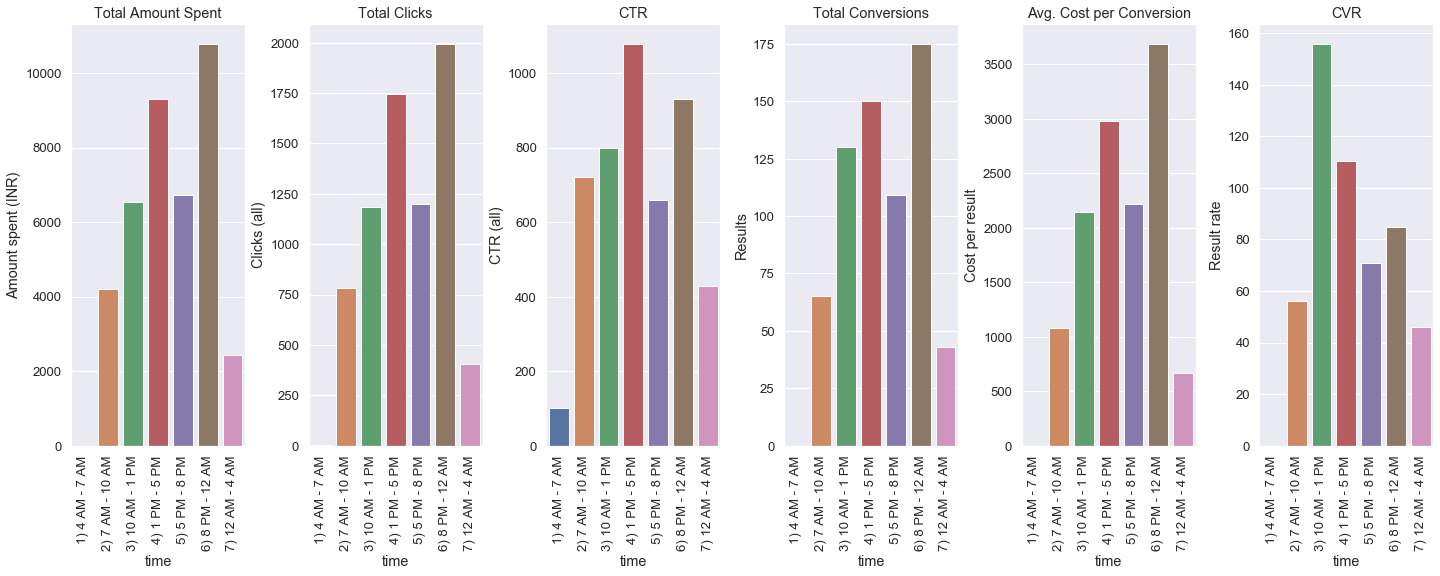

In [38]:
# increase figure size 
plt.figure(figsize=(20, 8))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x = 'time', y = 'Amount spent (INR)' , data = data, estimator = np.sum, ci = None)
plt.title("Total Amount Spent")
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x = 'time', y = 'Clicks (all)' , data = data, estimator = np.sum, ci = None)
plt.title("Total Clicks")
plt.xticks(rotation = 90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x = 'time', y = 'CTR (all)' , data = data, estimator = np.sum, ci = None)
plt.title("CTR")
plt.xticks(rotation = 90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x = 'time', y = 'Results' , data = data, estimator = np.sum, ci = None)
plt.title("Total Conversions")
plt.xticks(rotation = 90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x = 'time', y = 'Cost per result' , data = data, estimator = np.sum, ci = None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation = 90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x = 'time', y = 'Result rate' , data = data, estimator = np.sum, ci = None)
plt.title("CVR")
plt.xticks(rotation = 90)


plt.tight_layout(pad = 0.7)
plt.show()

### Let's Look at a Granular View

Text(0.5, 0.98, 'Avg. Conversion Rate of Each Ad')

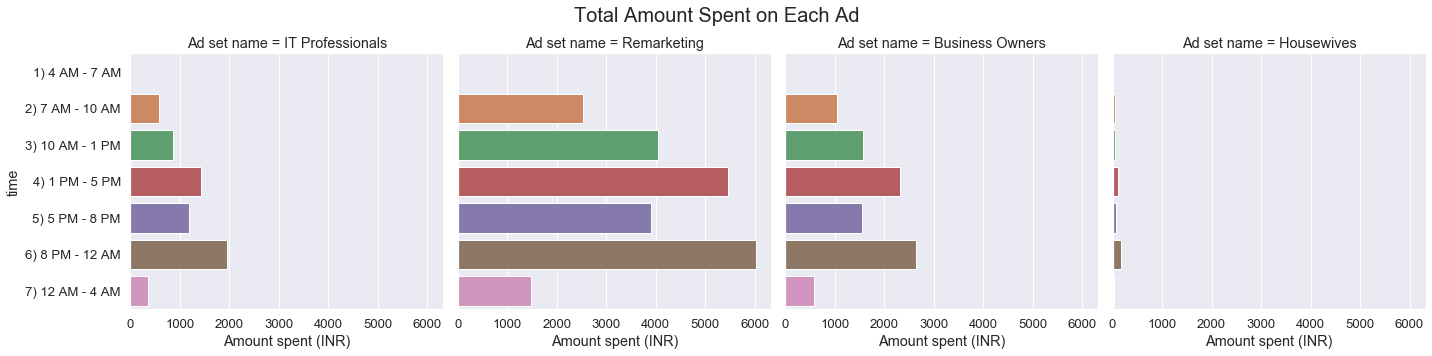

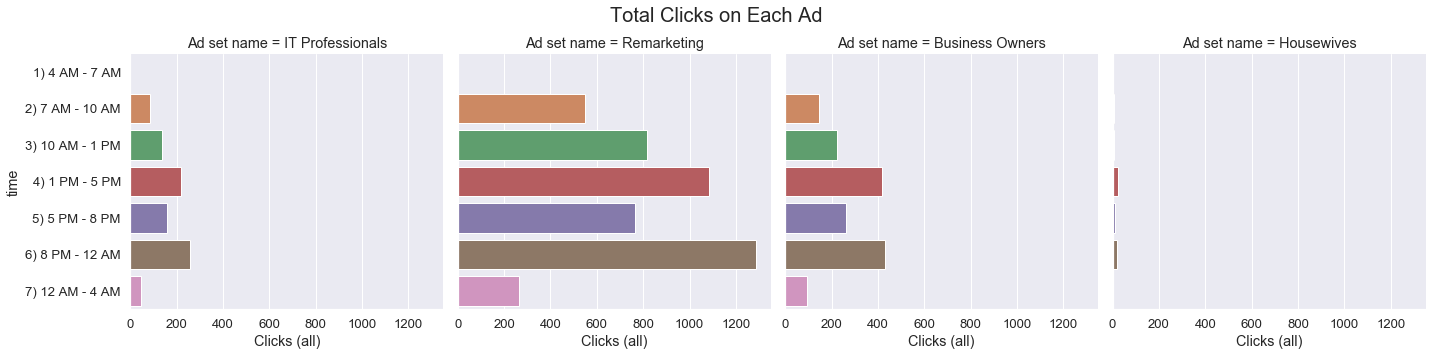

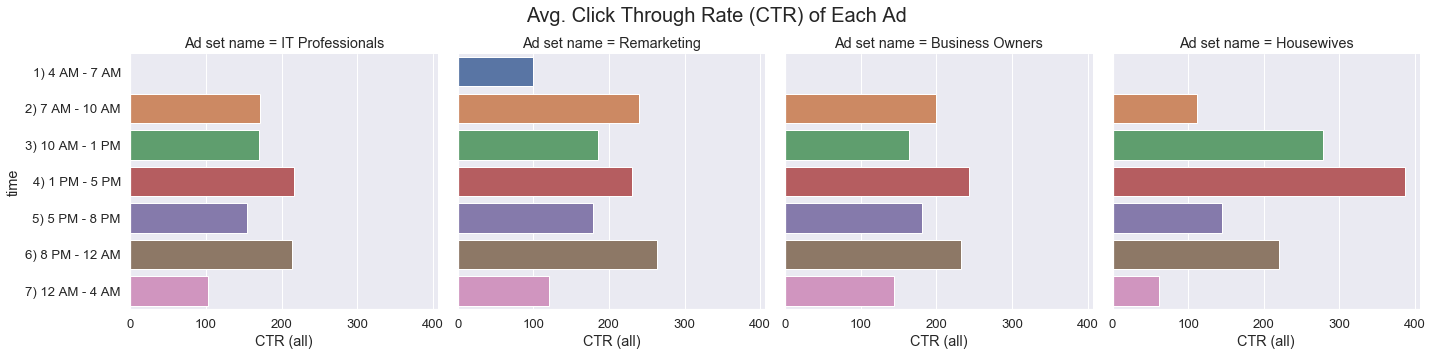

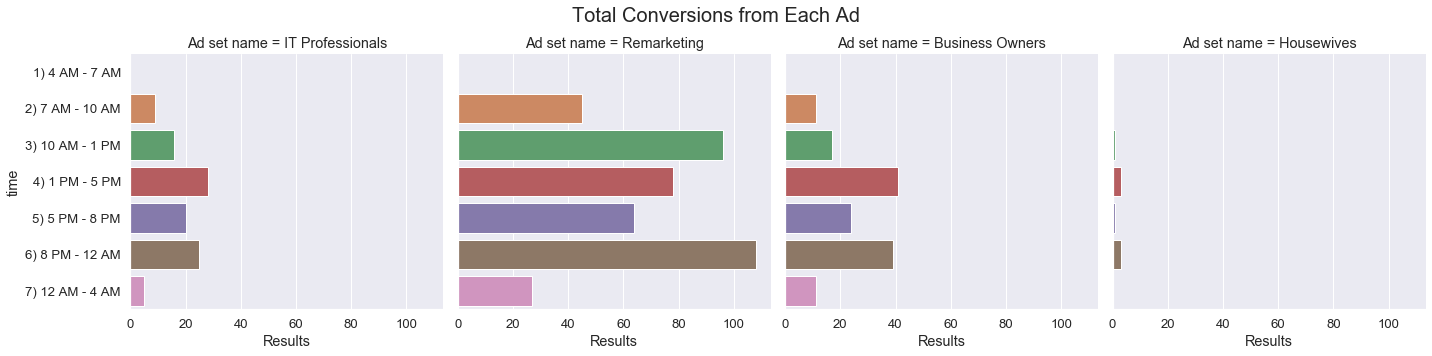

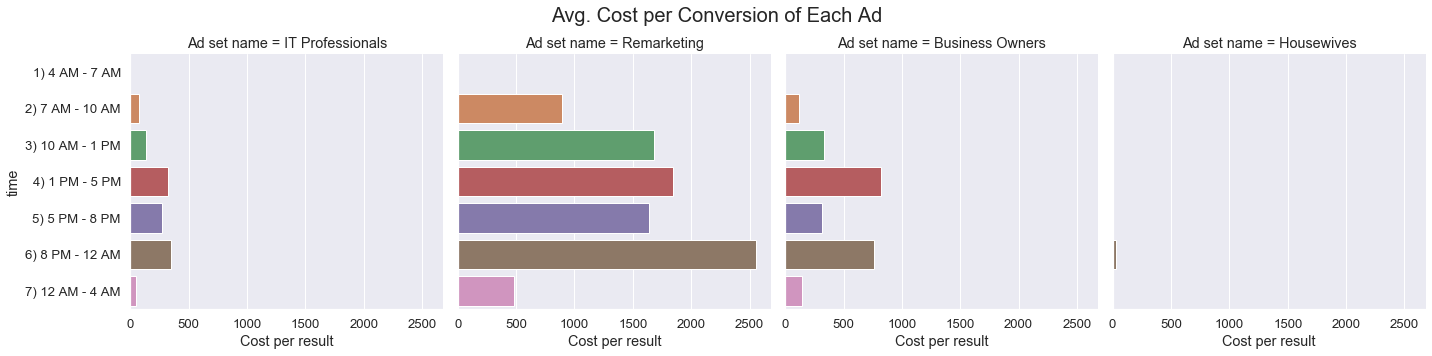

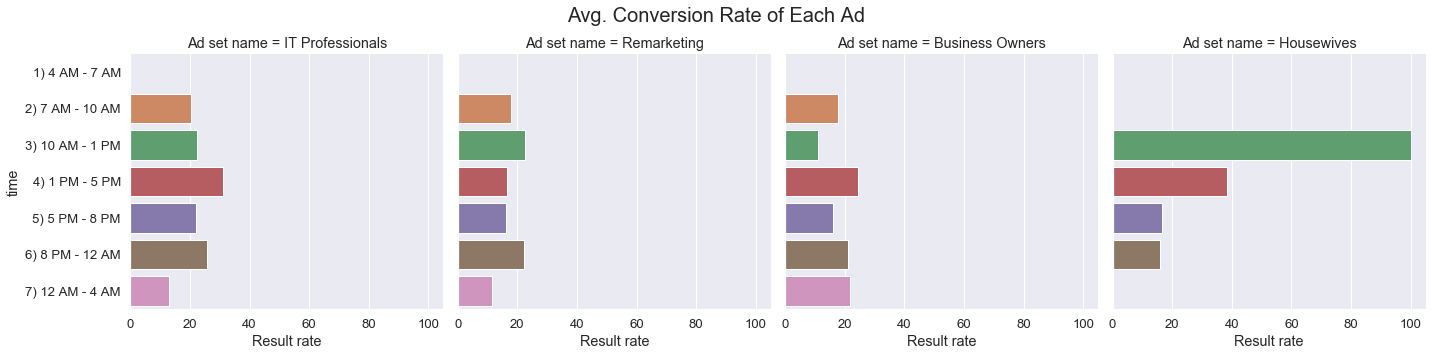

In [39]:
sns.catplot(y = 'time', x = 'Amount spent (INR)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Amount Spent on Each Ad', fontsize = 20)

sns.catplot(y = 'time', x = 'Clicks (all)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Clicks on Each Ad', fontsize = 20)

sns.catplot(y = 'time', x = 'CTR (all)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad', fontsize = 20)

sns.catplot(y = 'time', x = 'Results', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Conversions from Each Ad', fontsize = 20)

sns.catplot(y = 'time', x = 'Cost per result', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad', fontsize = 20)

sns.catplot(y = 'time', x = 'Result rate', col = 'Ad set name', data = data, kind = 'bar', aspect = 1, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad', fontsize = 20)

## 2. Effect of Targeting + Day of Week + Budget on Engagement & Conversion

In [40]:
data = data.sort_values(by = ['Day of Week']) 

### Generic View

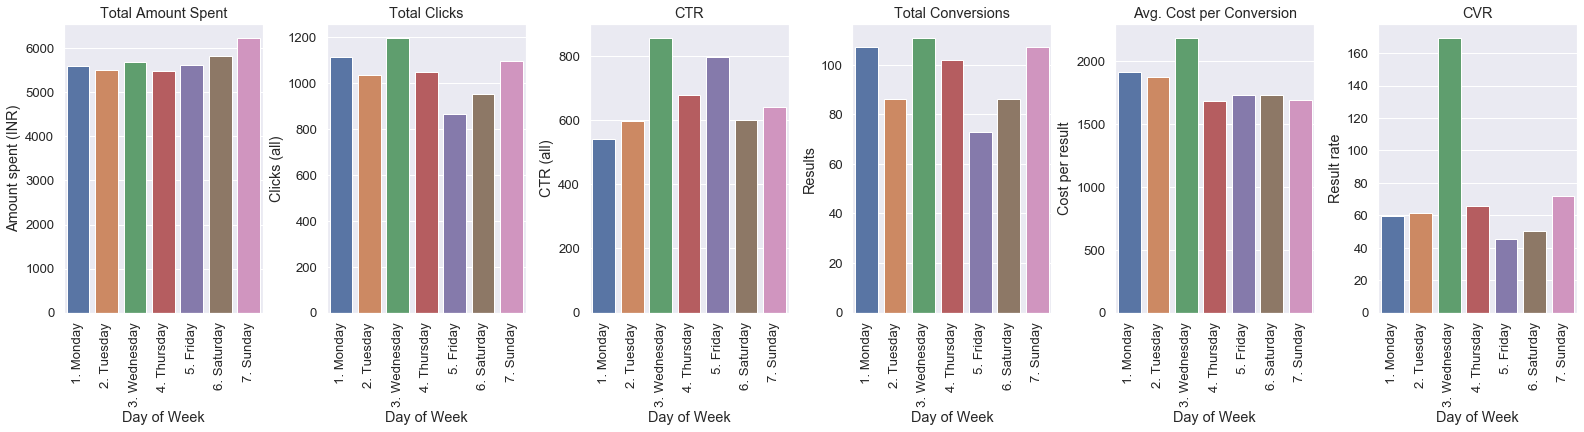

In [41]:
# increase figure size 
plt.figure(figsize = (22, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x = 'Day of Week', y = 'Amount spent (INR)', data = data, estimator = np.sum, ci = None)
plt.title("Total Amount Spent")
plt.xticks(rotation = 90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x = 'Day of Week', y = 'Clicks (all)', data = data, estimator = np.sum, ci = None)
plt.title("Total Clicks")
plt.xticks(rotation = 90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x = 'Day of Week', y = 'CTR (all)', data = data, estimator = np.sum, ci = None)
plt.title("CTR")
plt.xticks(rotation = 90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x = 'Day of Week', y = 'Results', data = data, estimator = np.sum, ci = None)
plt.title("Total Conversions")
plt.xticks(rotation = 90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x = 'Day of Week', y = 'Cost per result', data = data, estimator = np.sum, ci = None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation = 90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x = 'Day of Week', y = 'Result rate', data = data, estimator = np.sum, ci = None)
plt.title("CVR")
plt.xticks(rotation = 90)


plt.tight_layout(pad = 0.7)
plt.show()

### Granular View

Text(0.5, 0.98, 'Avg. Conversion Rate of Each Ad')

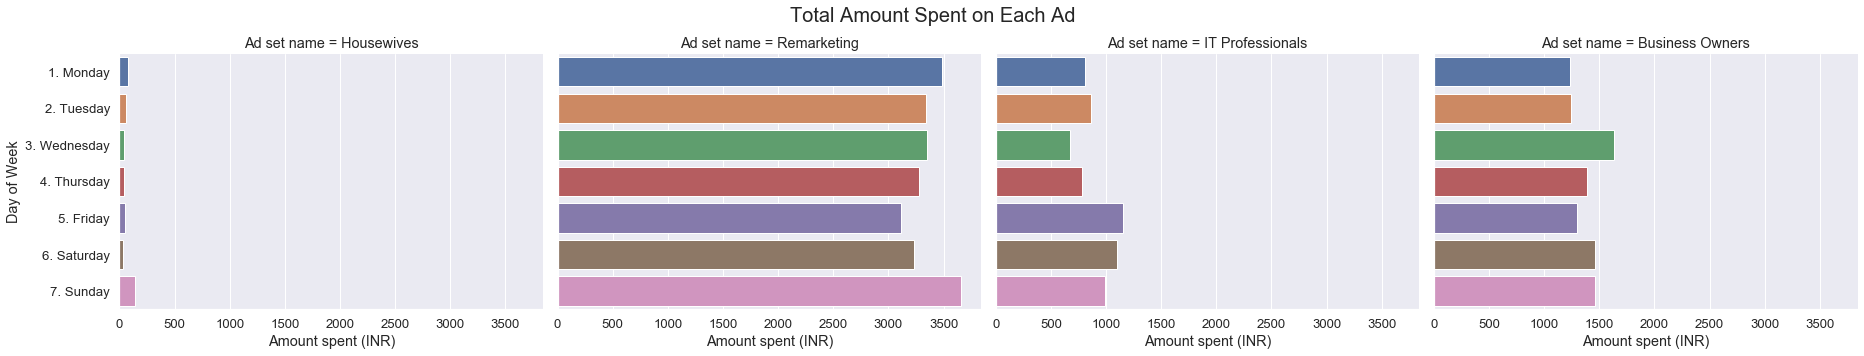

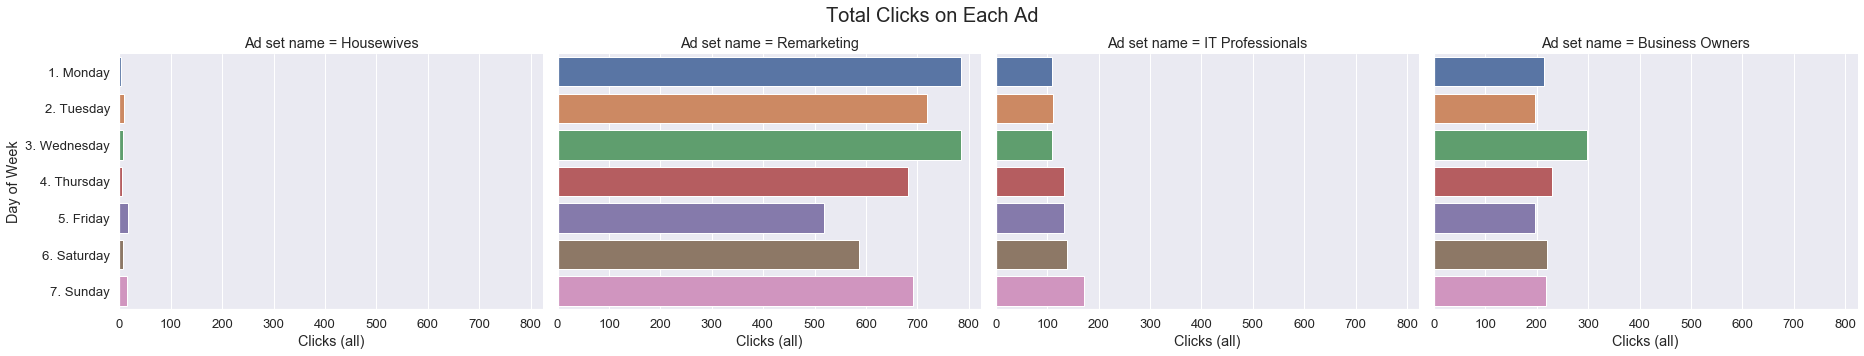

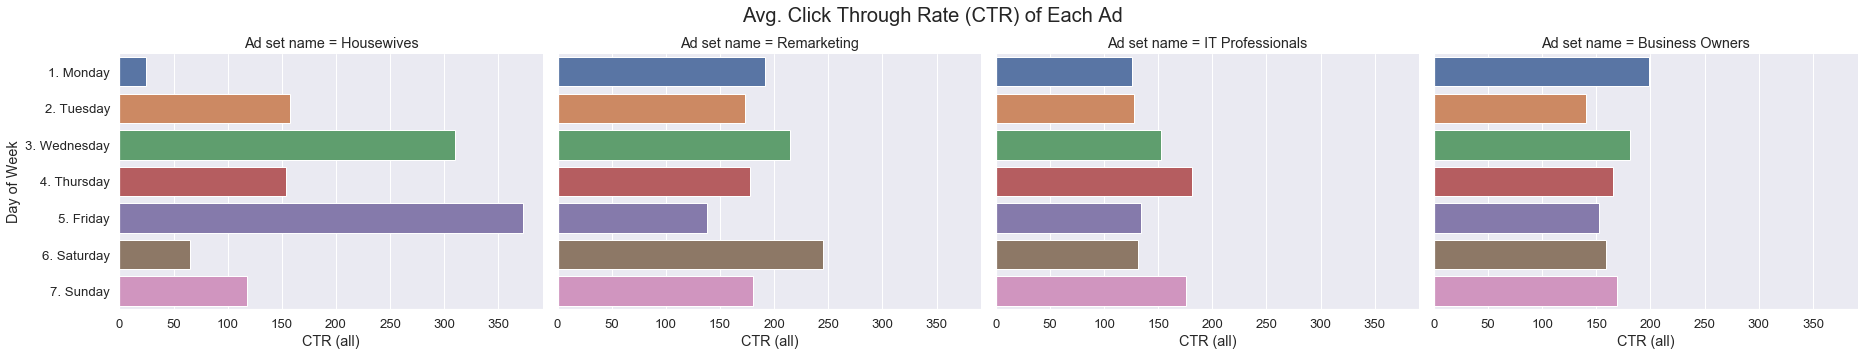

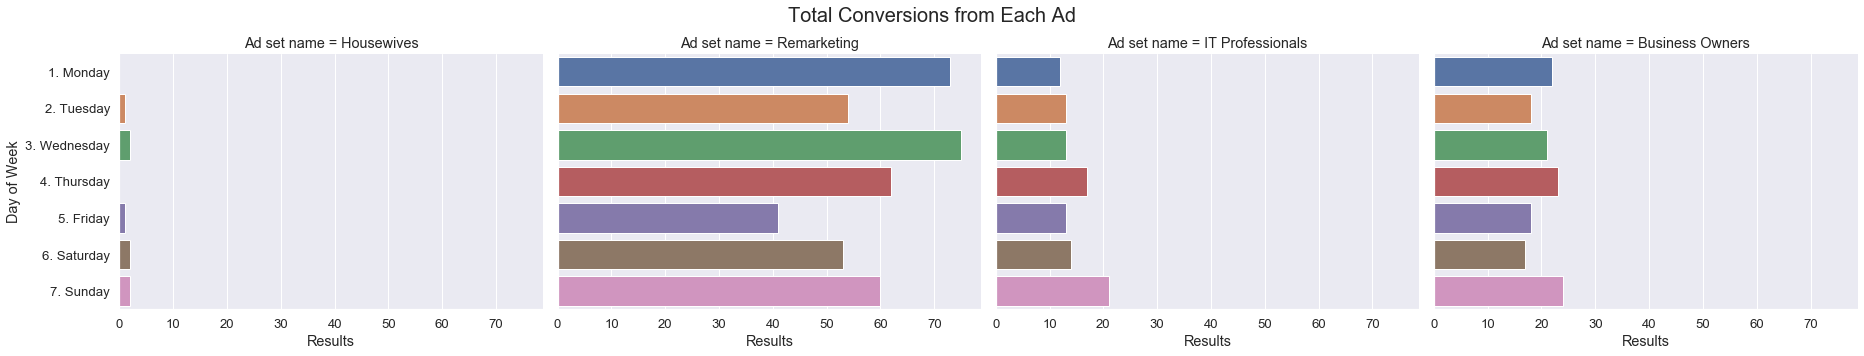

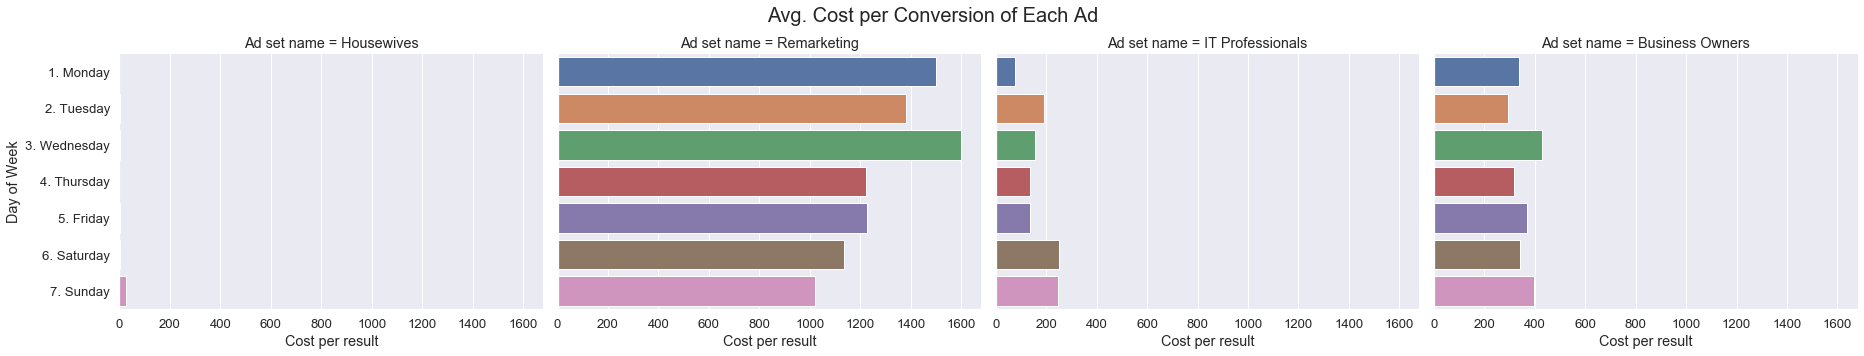

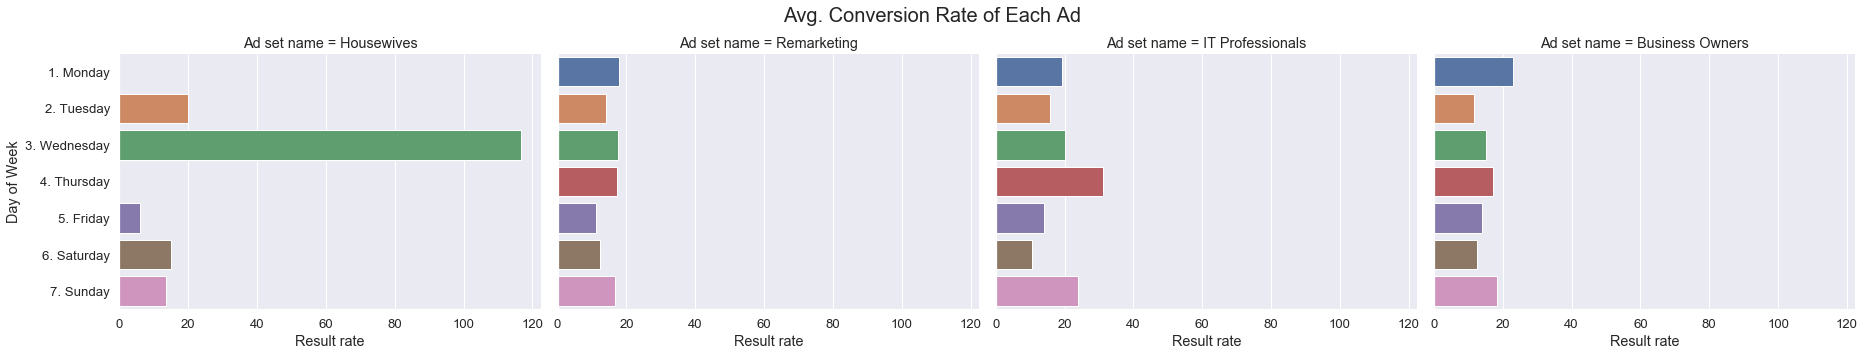

In [42]:
sns.catplot(y = 'Day of Week', x = 'Amount spent (INR)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Amount Spent on Each Ad', fontsize = 20)

sns.catplot(y = 'Day of Week', x = 'Clicks (all)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Clicks on Each Ad', fontsize = 20)

sns.catplot(y = 'Day of Week', x = 'CTR (all)', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad', fontsize = 20)

sns.catplot(y = 'Day of Week', x = 'Results', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Conversions from Each Ad', fontsize = 20)

sns.catplot(y = 'Day of Week', x = 'Cost per result', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad', fontsize = 20)

sns.catplot(y = 'Day of Week', x = 'Result rate', col = 'Ad set name', data = data, kind = 'bar', aspect = 1.3, estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad', fontsize = 20)

## 3. Effect of Time Series & Budget on Results

In [43]:
data = data.sort_values(by = ['Date']) 

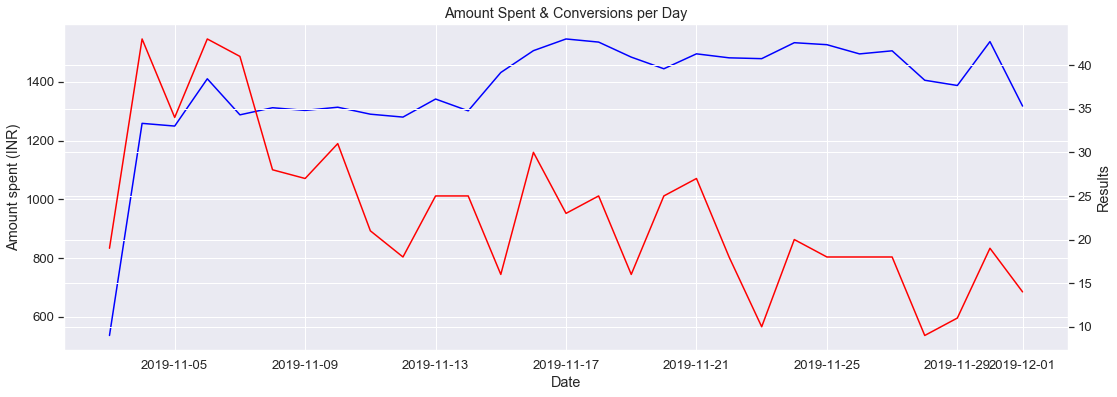

In [45]:
#Create combo chart
fig, ax1 = plt.subplots(figsize = (18,6))
#bar plot creation
ax1.set_title('Amount Spent & Conversions per Day')
ax1.set_xlabel('Date')
ax1 = sns.lineplot(y = 'Amount spent (INR)', x = 'Date', data = data, estimator = np.sum, color ='blue', ci = None)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Conversions')
ax2 = sns.lineplot(y = 'Results', x = 'Date', data = data, estimator = np.sum, color = 'red', ci = None)
#show plot
plt.show()

In [46]:
data['Ad set name'].value_counts()

Remarketing         558
IT Professionals    557
Business Owners     553
Housewives          501
Name: Ad set name, dtype: int64

In [47]:
#segregate data sets for each targeting
data_remarket = data[(data['Ad set name'] == 'Remarketing')]
data_IT = data[(data['Ad set name'] == 'IT Professionals')]
data_owner = data[(data['Ad set name'] == 'Business Owners')]
data_housewife = data[(data['Ad set name'] == 'Housewives')]

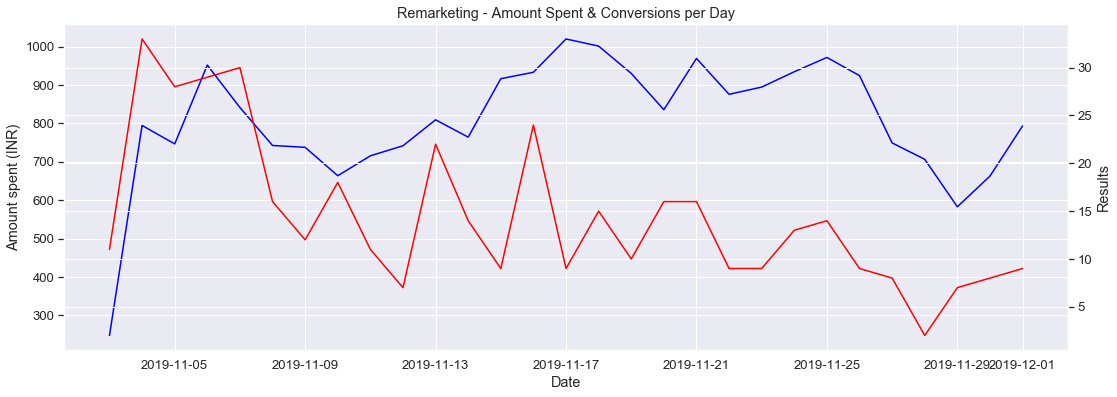

In [49]:
#Create combo chart
fig, ax1 = plt.subplots(figsize = (18,6))
#bar plot creation
ax1.set_title('Remarketing - Amount Spent & Conversions per Day')
ax1.set_xlabel('Date')
ax1 = sns.lineplot(y = 'Amount spent (INR)', x = 'Date', data = data_remarket, estimator = np.sum, color = 'blue', ci = None)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Conversions')
ax2 = sns.lineplot(y = 'Results', x = 'Date', data = data_remarket, estimator = np.sum, color = 'red', ci = None)
#show plot
plt.show()

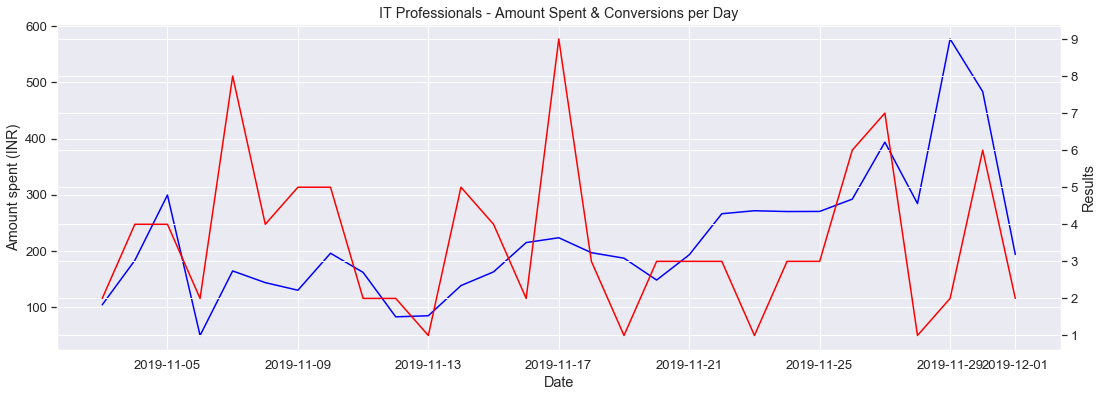

In [50]:
#Create combo chart
fig, ax1 = plt.subplots(figsize = (18,6))
#bar plot creation
ax1.set_title('IT Professionals - Amount Spent & Conversions per Day')
ax1.set_xlabel('Date')
ax1 = sns.lineplot(y = 'Amount spent (INR)', x = 'Date', data = data_IT, estimator = np.sum, color = 'blue', ci = None)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Conversions')
ax2 = sns.lineplot(y = 'Results', x = 'Date', data = data_IT, estimator = np.sum, color = 'red', ci = None)
#show plot
plt.show()

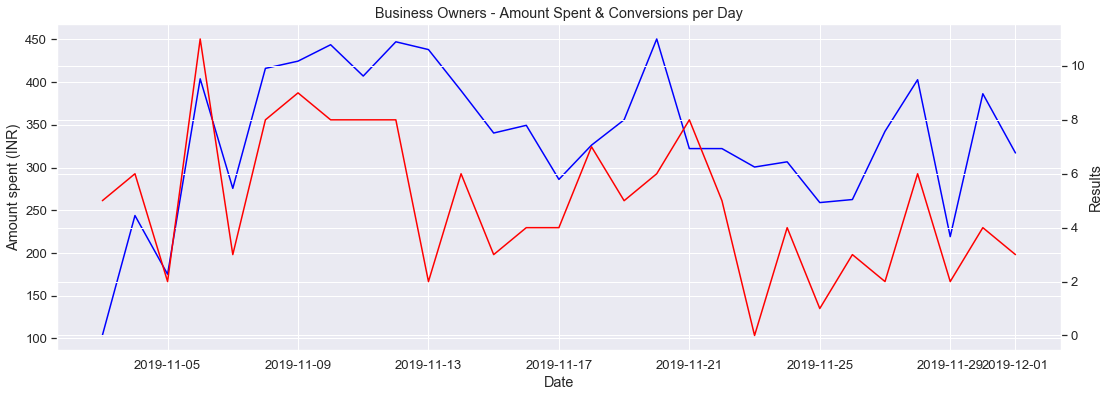

In [51]:
#Create combo chart
fig, ax1 = plt.subplots(figsize = (18,6))
#bar plot creation
ax1.set_title('Business Owners - Amount Spent & Conversions per Day')
ax1.set_xlabel('Date')
ax1 = sns.lineplot(y = 'Amount spent (INR)', x = 'Date', data = data_owner, estimator = np.sum, color = 'blue', ci = None)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Conversions')
ax2 = sns.lineplot(y = 'Results', x = 'Date', data = data_owner, estimator = np.sum, color = 'red', ci = None)
#show plot
plt.show()

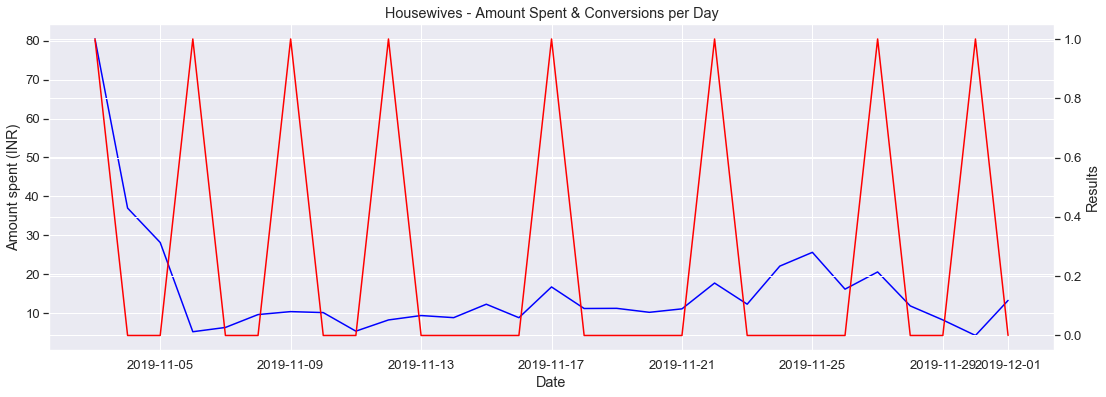

In [52]:
#Create combo chart
fig, ax1 = plt.subplots(figsize = (18,6))
#bar plot creation
ax1.set_title('Housewives - Amount Spent & Conversions per Day')
ax1.set_xlabel('Date')
ax1 = sns.lineplot(y = 'Amount spent (INR)', x = 'Date', data = data_housewife, estimator = np.sum, color = 'blue', ci = None)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Conversions')
ax2 = sns.lineplot(y = 'Results', x = 'Date', data = data_housewife, estimator = np.sum, color = 'red', ci = None)
#show plot
plt.show()